# Parameter Recovery Results Dashboard

This notebook provides an interactive dashboard for analyzing parameter recovery experiment results.

## Overview
- Load results from completed parameter recovery runs
- Display parameter comparison tables
- Visualize figures (psychometric curves, confidence plots, etc.)
- Calculate summary statistics and correlations

## Setup

In [2]:
import os
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

# Add path to import utilities
sys.path.insert(0, str(Path.cwd().parent.parent.parent))
from ValidationSchedules.ParameterRecovery.webapp import utils

# Configure matplotlib
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

## Configuration

Specify the experiment to analyze:

In [11]:
# Define experiment parameters
# Update these paths for your experiment
project_root = Path.cwd().parent.parent.parent
primary_storage_dir = project_root / "Experimentations" / "ParameterRecovery"
experiment_id = "EXP0000.num_runs50"  # Change this to your experiment ID

experiment_path = primary_storage_dir / experiment_id
print(f"Experiment path: {experiment_path}")
print(f"Exists: {experiment_path.exists()}")

Experiment path: /Users/awritrojitbanerjee/Library/CloudStorage/GoogleDrive-awritrojit2000@gmail.com/My Drive/PhD/ReMeta/remeta-project/Experimentations/ParameterRecovery/EXP0000.num_runs50
Exists: True


## Load Available Runs

In [12]:
available_runs = utils.list_available_runs(str(primary_storage_dir), experiment_id)
print(f"Found {len(available_runs)} runs:")
for run_id in available_runs:
    run_dir = experiment_path / run_id
    status = utils.check_run_status(str(run_dir))
    print(f"  - {run_id}: {status}")

Found 50 runs:
  - run_0: SUCCESS
  - run_1: SUCCESS
  - run_10: SUCCESS
  - run_11: SUCCESS
  - run_12: SUCCESS
  - run_13: SUCCESS
  - run_14: SUCCESS
  - run_15: SUCCESS
  - run_16: SUCCESS
  - run_17: SUCCESS
  - run_18: SUCCESS
  - run_19: SUCCESS
  - run_2: SUCCESS
  - run_20: SUCCESS
  - run_21: SUCCESS
  - run_22: SUCCESS
  - run_23: SUCCESS
  - run_24: SUCCESS
  - run_25: SUCCESS
  - run_26: SUCCESS
  - run_27: SUCCESS
  - run_28: SUCCESS
  - run_29: SUCCESS
  - run_3: SUCCESS
  - run_30: SUCCESS
  - run_31: SUCCESS
  - run_32: SUCCESS
  - run_33: SUCCESS
  - run_34: SUCCESS
  - run_35: SUCCESS
  - run_36: SUCCESS
  - run_37: SUCCESS
  - run_38: SUCCESS
  - run_39: SUCCESS
  - run_4: SUCCESS
  - run_40: SUCCESS
  - run_41: SUCCESS
  - run_42: SUCCESS
  - run_43: SUCCESS
  - run_44: SUCCESS
  - run_45: SUCCESS
  - run_46: SUCCESS
  - run_47: SUCCESS
  - run_48: SUCCESS
  - run_49: SUCCESS
  - run_5: SUCCESS
  - run_6: SUCCESS
  - run_7: SUCCESS
  - run_8: SUCCESS
  - run_9: SUC

## Analyze Individual Runs

For each run, display detailed results:

In [ ]:
def display_run_results(run_id, showfig=True):
    """Display comprehensive results for a single run."""
    run_dir = str(experiment_path / run_id)
    
    print(f"\n{'='*80}")
    print(f"Run ID: {run_id}")
    print(f"{'='*80}\n")
    
    # Check status
    status = utils.check_run_status(run_dir)
    if status != "SUCCESS":
        print(f"⚠️ Run status: {status}")
        return
    
    # Load results
    try:
        results_df, extras_dict = utils.load_param_recov_results(run_dir)
    except Exception as e:
        print(f"❌ Error loading results: {e}")
        return
    
    # Display parameter comparison table
    print("\n📊 Parameter Comparison")
    print("-" * 80)
    display(results_df)
    
    # Display negative log-likelihood comparison
    print("\n📉 Negative Log-Likelihood Comparison")
    print("-" * 80)
    negll_df = utils.format_negll_table(extras_dict['negll'])
    display(negll_df)
    
    # Display AIC comparison (if available)
    if extras_dict.get('aic') and extras_dict['aic']:
        print("\n📊 AIC Comparison")
        print("-" * 80)
        aic_df = utils.format_aic_table(extras_dict['aic'])
        display(aic_df)
        
        # Add interpretation
        aic_total_delta = aic_df[aic_df['Component'] == 'Total']['Delta'].values
        if len(aic_total_delta) > 0:
            delta = aic_total_delta[0]
            if delta < 0:
                print(f"✓ Fitted model has BETTER AIC (lower by {-delta:.2f})")
            elif delta > 0:
                print(f"⚠️ Fitted model has WORSE AIC (higher by {delta:.2f})")
            else:
                print("= AICs are equal")
    
    # Calculate and display summary statistics
    print("\n📈 Summary Statistics")
    print("-" * 80)
    mean_abs_delta = results_df['Delta'].abs().mean()
    max_abs_delta = results_df['Delta'].abs().max()
    print(f"Mean |Delta|: {mean_abs_delta:.6f}")
    print(f"Max |Delta|:  {max_abs_delta:.6f}")
    
    if showfig:
        # Display figures
        print("\n🎨 Figures")
        print("-" * 80)
        fig_paths = utils.load_param_recov_figs(run_dir, format='png')
        
        for fig_name, fig_path in fig_paths.items():
            if fig_path and os.path.exists(fig_path):
                print(f"\n{fig_name.replace('_', ' ').title()}:")
                display(Image(filename=fig_path))
            else:
                print(f"\n⚠️ {fig_name}: Not found")

### Display Results for Each Run

In [14]:
# Display results for all runs
for run_id in available_runs:
    display_run_results(run_id, showfig=False)


Run ID: run_0


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.102382,0.002382
1,bias_sens,0.0,-0.013290,-0.013290
2,noise_meta,0.2,0.195651,-0.004349
3,evidence_bias_mult_meta,1.0,1.071847,0.071847



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,167.548280,166.470918
1,Metacognitive,9219.393513,9213.041489



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.022967
Max |Delta|:  0.071847

Run ID: run_1


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.102033,0.002033
1,bias_sens,0.0,-0.007726,-0.007726
2,noise_meta,0.2,0.191471,-0.008529
3,evidence_bias_mult_meta,1.0,0.975336,-0.024664



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,163.013781,162.595034
1,Metacognitive,9127.310645,9114.469447



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.010738
Max |Delta|:  0.024664

Run ID: run_10


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.101970,0.001970
1,bias_sens,0.0,-0.017219,-0.017219
2,noise_meta,0.2,0.192161,-0.007839
3,evidence_bias_mult_meta,1.0,0.982886,-0.017114



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,167.548280,165.929608
1,Metacognitive,9202.427446,9191.486174



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.011036
Max |Delta|:  0.017219

Run ID: run_11


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.105501,0.005501
1,bias_sens,0.0,0.010352,0.010352
2,noise_meta,0.2,0.191761,-0.008239
3,evidence_bias_mult_meta,1.0,1.055290,0.055290



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,185.686274,184.123585
1,Metacognitive,9173.770708,9157.551641



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.019845
Max |Delta|:  0.055290

Run ID: run_12


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.099512,-0.000488
1,bias_sens,0.0,0.010500,0.010500
2,noise_meta,0.2,0.194450,-0.005550
3,evidence_bias_mult_meta,1.0,0.949393,-0.050607



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,149.410286,148.934285
1,Metacognitive,9227.186878,9222.272478



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.016786
Max |Delta|:  0.050607

Run ID: run_13


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.100169,0.000169
1,bias_sens,0.0,0.012289,0.012289
2,noise_meta,0.2,0.191782,-0.008218
3,evidence_bias_mult_meta,1.0,0.935199,-0.064801



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,153.944785,153.268822
1,Metacognitive,9178.533144,9167.504626



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.021369
Max |Delta|:  0.064801

Run ID: run_14


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.096345,-0.003655
1,bias_sens,0.0,-0.007096,-0.007096
2,noise_meta,0.2,0.191923,-0.008077
3,evidence_bias_mult_meta,1.0,0.946447,-0.053553



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,131.272293,130.744244
1,Metacognitive,9071.273028,9060.287747



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.018095
Max |Delta|:  0.053553

Run ID: run_15


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.094500,-0.005500
1,bias_sens,0.0,-0.007620,-0.007620
2,noise_meta,0.2,0.190786,-0.009214
3,evidence_bias_mult_meta,1.0,0.821856,-0.178144



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,122.203296,121.240764
1,Metacognitive,9100.879703,9084.756118



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.050120
Max |Delta|:  0.178144

Run ID: run_16


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.097322,-0.002678
1,bias_sens,0.0,-0.004568,-0.004568
2,noise_meta,0.2,0.192410,-0.007590
3,evidence_bias_mult_meta,1.0,0.935597,-0.064403



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,135.806791,135.535763
1,Metacognitive,9120.941871,9111.684331



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.019810
Max |Delta|:  0.064403

Run ID: run_17


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.102795,0.002795
1,bias_sens,0.0,-0.007536,-0.007536
2,noise_meta,0.2,0.188979,-0.011021
3,evidence_bias_mult_meta,1.0,0.931543,-0.068457



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,167.548280,167.022628
1,Metacognitive,9133.685179,9113.790026



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.022452
Max |Delta|:  0.068457

Run ID: run_18


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,9.652069e-02,-3.479305e-03
1,bias_sens,0.0,-1.370032e-09,-1.370032e-09
2,noise_meta,0.2,1.917514e-01,-8.248569e-03
3,evidence_bias_mult_meta,1.0,8.885894e-01,-1.114106e-01



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,131.272293,130.944062
1,Metacognitive,9177.920539,9166.880412



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.030785
Max |Delta|:  0.111411

Run ID: run_19


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.097322,-0.002678
1,bias_sens,0.0,-0.004568,-0.004568
2,noise_meta,0.2,0.191957,-0.008043
3,evidence_bias_mult_meta,1.0,0.900374,-0.099626



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,135.806791,135.535763
1,Metacognitive,9147.714215,9137.231627



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.028729
Max |Delta|:  0.099626

Run ID: run_2


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.096988,-0.003012
1,bias_sens,0.0,-0.024635,-0.024635
2,noise_meta,0.2,0.191624,-0.008376
3,evidence_bias_mult_meta,1.0,0.968833,-0.031167



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,144.875788,142.400652
1,Metacognitive,9038.753092,9026.362755



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.016798
Max |Delta|:  0.031167

Run ID: run_20


📊 Parameter Comparison
--------------------------------------------------------------------------------

📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.096932,-0.003068
1,bias_sens,0.0,-0.011515,-0.011515
2,noise_meta,0.2,0.190943,-0.009057
3,evidence_bias_mult_meta,1.0,0.905059,-0.094941



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,135.806791,135.086071
1,Metacognitive,9127.882179,9114.526913



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.029645
Max |Delta|:  0.094941

Run ID: run_21


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.098014,-0.001986
1,bias_sens,0.0,-0.017539,-0.017539
2,noise_meta,0.2,0.191901,-0.008099
3,evidence_bias_mult_meta,1.0,0.920245,-0.079755



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,144.875788,143.575253
1,Metacognitive,9169.600641,9159.002396



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.026845
Max |Delta|:  0.079755

Run ID: run_22


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.092104,-0.007896
1,bias_sens,0.0,-0.013892,-0.013892
2,noise_meta,0.2,0.192248,-0.007752
3,evidence_bias_mult_meta,1.0,0.886671,-0.113329



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,113.134299,111.109826
1,Metacognitive,9050.518009,9040.593946



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.035717
Max |Delta|:  0.113329

Run ID: run_23


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.102881,0.002881
1,bias_sens,0.0,-0.005643,-0.005643
2,noise_meta,0.2,0.194774,-0.005226
3,evidence_bias_mult_meta,1.0,1.072642,0.072642



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,167.548280,167.138833
1,Metacognitive,9227.006317,9218.668902



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.021598
Max |Delta|:  0.072642

Run ID: run_24


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.096724,-0.003276
1,bias_sens,0.0,-0.013881,-0.013881
2,noise_meta,0.2,0.192172,-0.007828
3,evidence_bias_mult_meta,1.0,0.990527,-0.009473



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,135.806791,134.848262
1,Metacognitive,9098.953556,9087.452984



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.008615
Max |Delta|:  0.013881

Run ID: run_25


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.105756,0.005756
1,bias_sens,0.0,0.015319,0.015319
2,noise_meta,0.2,0.191100,-0.008900
3,evidence_bias_mult_meta,1.0,1.055323,0.055323



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,190.220772,187.754405
1,Metacognitive,9158.856819,9140.160797



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.021324
Max |Delta|:  0.055323

Run ID: run_26


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.093362,-0.006638
1,bias_sens,0.0,-0.010602,-0.010602
2,noise_meta,0.2,0.191455,-0.008545
3,evidence_bias_mult_meta,1.0,0.868234,-0.131766



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,117.668797,116.238169
1,Metacognitive,9092.379286,9079.972446



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.039388
Max |Delta|:  0.131766

Run ID: run_27


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.094130,-0.005870
1,bias_sens,0.0,-0.012809,-0.012809
2,noise_meta,0.2,0.187615,-0.012385
3,evidence_bias_mult_meta,1.0,0.851828,-0.148172



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,122.203296,120.848326
1,Metacognitive,9024.650396,8999.244668



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.044809
Max |Delta|:  0.148172

Run ID: run_28


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.099016,-0.000984
1,bias_sens,0.0,0.004295,0.004295
2,noise_meta,0.2,0.192396,-0.007604
3,evidence_bias_mult_meta,1.0,0.979779,-0.020221



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,144.875788,144.773545
1,Metacognitive,9131.481123,9121.110733



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.008276
Max |Delta|:  0.020221

Run ID: run_29


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.097322,-0.002678
1,bias_sens,0.0,0.004568,0.004568
2,noise_meta,0.2,0.191875,-0.008125
3,evidence_bias_mult_meta,1.0,0.929955,-0.070045



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,135.806791,135.535763
1,Metacognitive,9066.735504,9056.094294



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.021354
Max |Delta|:  0.070045

Run ID: run_3


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.102881,0.002881
1,bias_sens,0.0,-0.005643,-0.005643
2,noise_meta,0.2,0.192568,-0.007432
3,evidence_bias_mult_meta,1.0,1.046795,0.046795



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,167.548280,167.138833
1,Metacognitive,9134.243698,9121.251911



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.015688
Max |Delta|:  0.046795

Run ID: run_30


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,9.907992e-02,-9.200820e-04
1,bias_sens,0.0,1.586680e-09,1.586680e-09
2,noise_meta,0.2,1.916612e-01,-8.338801e-03
3,evidence_bias_mult_meta,1.0,9.343684e-01,-6.563155e-02



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,144.875788,144.852145
1,Metacognitive,9137.145340,9125.926942



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.018723
Max |Delta|:  0.065632

Run ID: run_31


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.102033,0.002033
1,bias_sens,0.0,-0.007726,-0.007726
2,noise_meta,0.2,0.191257,-0.008743
3,evidence_bias_mult_meta,1.0,0.897469,-0.102531



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,163.013781,162.595034
1,Metacognitive,9246.936424,9234.580441



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.030258
Max |Delta|:  0.102531

Run ID: run_32


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.095541,-0.004459
1,bias_sens,0.0,0.004886,0.004886
2,noise_meta,0.2,0.194044,-0.005956
3,evidence_bias_mult_meta,1.0,1.040676,0.040676



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,126.737794,126.131618
1,Metacognitive,9083.464518,9075.095632



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.013994
Max |Delta|:  0.040676

Run ID: run_33


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.098230,-0.001770
1,bias_sens,0.0,0.002211,0.002211
2,noise_meta,0.2,0.191269,-0.008731
3,evidence_bias_mult_meta,1.0,0.899403,-0.100597



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,140.341289,140.235860
1,Metacognitive,9138.481596,9126.199187



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.028327
Max |Delta|:  0.100597

Run ID: run_34


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.097972,-0.002028
1,bias_sens,0.0,0.008891,0.008891
2,noise_meta,0.2,0.192041,-0.007959
3,evidence_bias_mult_meta,1.0,0.878477,-0.121523



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,140.341289,139.928466
1,Metacognitive,9207.858757,9197.270502



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.035100
Max |Delta|:  0.121523

Run ID: run_35


📊 Parameter Comparison
--------------------------------------------------------------------------------

📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,1.022391e-01,2.239130e-03
1,bias_sens,0.0,-4.315855e-10,-4.315855e-10
2,noise_meta,0.2,1.920453e-01,-7.954689e-03
3,evidence_bias_mult_meta,1.0,9.746932e-01,-2.530676e-02



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,163.013781,162.868909
1,Metacognitive,9160.968638,9149.864604



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.008875
Max |Delta|:  0.025307

Run ID: run_36


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.095833,-0.004167
1,bias_sens,0.0,-0.021225,-0.021225
2,noise_meta,0.2,0.191423,-0.008577
3,evidence_bias_mult_meta,1.0,0.957692,-0.042308



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,135.806791,133.858298
1,Metacognitive,9098.325293,9085.642092



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.019069
Max |Delta|:  0.042308

Run ID: run_37


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.097322,-0.002678
1,bias_sens,0.0,-0.004568,-0.004568
2,noise_meta,0.2,0.193001,-0.006999
3,evidence_bias_mult_meta,1.0,0.990313,-0.009687



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,135.806791,135.535763
1,Metacognitive,9106.796801,9097.637472



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.005983
Max |Delta|:  0.009687

Run ID: run_38


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.097375,-0.002625
1,bias_sens,0.0,0.022216,0.022216
2,noise_meta,0.2,0.189918,-0.010082
3,evidence_bias_mult_meta,1.0,0.968512,-0.031488



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,144.875788,142.837772
1,Metacognitive,9076.895046,9058.679656



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.016603
Max |Delta|:  0.031488

Run ID: run_39


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.107229,0.007229
1,bias_sens,0.0,-0.001645,-0.001645
2,noise_meta,0.2,0.193593,-0.006407
3,evidence_bias_mult_meta,1.0,1.095593,0.095593



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,194.75527,193.152032
1,Metacognitive,9241.53431,9228.220866



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.027719
Max |Delta|:  0.095593

Run ID: run_4


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.096501,-0.003499
1,bias_sens,0.0,0.002357,0.002357
2,noise_meta,0.2,0.194196,-0.005804
3,evidence_bias_mult_meta,1.0,0.915631,-0.084369



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,131.272293,130.921916
1,Metacognitive,9201.761538,9196.335401



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.024007
Max |Delta|:  0.084369

Run ID: run_40


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.099064,-0.000936
1,bias_sens,0.0,0.002145,0.002145
2,noise_meta,0.2,0.190052,-0.009948
3,evidence_bias_mult_meta,1.0,0.978116,-0.021884



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,144.875788,144.832510
1,Metacognitive,9014.385018,8996.233287



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.008728
Max |Delta|:  0.021884

Run ID: run_41


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.098821,-0.001179
1,bias_sens,0.0,-0.008624,-0.008624
2,noise_meta,0.2,0.192295,-0.007705
3,evidence_bias_mult_meta,1.0,0.987166,-0.012834



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,144.875788,144.536810
1,Metacognitive,9137.174135,9126.334953



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.007586
Max |Delta|:  0.012834

Run ID: run_42


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.094851,-0.005149
1,bias_sens,0.0,0.014888,0.014888
2,noise_meta,0.2,0.192611,-0.007389
3,evidence_bias_mult_meta,1.0,0.905432,-0.094568



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,126.737794,125.381073
1,Metacognitive,9117.766433,9108.753820



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.030499
Max |Delta|:  0.094568

Run ID: run_43


📊 Parameter Comparison
--------------------------------------------------------------------------------

📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.095092,-0.004908
1,bias_sens,0.0,-0.012340,-0.012340
2,noise_meta,0.2,0.194271,-0.005729
3,evidence_bias_mult_meta,1.0,0.861540,-0.138460



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,126.737794,125.641011
1,Metacognitive,9251.473545,9244.258138



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.040359
Max |Delta|:  0.138460

Run ID: run_44


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.105777,0.005777
1,bias_sens,0.0,0.005151,0.005151
2,noise_meta,0.2,0.191324,-0.008676
3,evidence_bias_mult_meta,1.0,1.138404,0.138404



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,185.686274,184.522537
1,Metacognitive,9107.024076,9082.680613



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.039502
Max |Delta|:  0.138404

Run ID: run_45


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.093177,-0.006823
1,bias_sens,0.0,-0.020951,-0.020951
2,noise_meta,0.2,0.192306,-0.007694
3,evidence_bias_mult_meta,1.0,0.836756,-0.163244



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,122.203296,119.870285
1,Metacognitive,9194.159047,9182.400513



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.049678
Max |Delta|:  0.163244

Run ID: run_46


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.100635,0.000635
1,bias_sens,0.0,-0.004059,-0.004059
2,noise_meta,0.2,0.191963,-0.008037
3,evidence_bias_mult_meta,1.0,1.002726,0.002726



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,153.944785,153.858085
1,Metacognitive,9136.410721,9123.833757



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.003864
Max |Delta|:  0.008037

Run ID: run_47


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.102683,0.002683
1,bias_sens,0.0,-0.009439,-0.009439
2,noise_meta,0.2,0.191148,-0.008852
3,evidence_bias_mult_meta,1.0,1.008277,0.008277



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,167.548280,166.872802
1,Metacognitive,9145.728535,9130.257309



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.007313
Max |Delta|:  0.009439

Run ID: run_48


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,9.739435e-02,-2.605648e-03
1,bias_sens,0.0,-1.066144e-09,-1.066144e-09
2,noise_meta,0.2,1.944831e-01,-5.516918e-03
3,evidence_bias_mult_meta,1.0,9.793773e-01,-2.062265e-02



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,135.806791,135.620794
1,Metacognitive,9120.802259,9115.427496



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.007186
Max |Delta|:  0.020623

Run ID: run_49


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.101132,0.001132
1,bias_sens,0.0,-0.009935,-0.009935
2,noise_meta,0.2,0.192177,-0.007823
3,evidence_bias_mult_meta,1.0,0.973376,-0.026624



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,158.479283,157.973845
1,Metacognitive,9203.628104,9192.924875



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.011378
Max |Delta|:  0.026624

Run ID: run_5


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.088490,-0.011510
1,bias_sens,0.0,0.003296,0.003296
2,noise_meta,0.2,0.192577,-0.007423
3,evidence_bias_mult_meta,1.0,0.767592,-0.232408



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,94.996305,91.751619
1,Metacognitive,9180.433032,9162.925195



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.063660
Max |Delta|:  0.232408

Run ID: run_6


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.100331,0.000331
1,bias_sens,0.0,0.010208,0.010208
2,noise_meta,0.2,0.195969,-0.004031
3,evidence_bias_mult_meta,1.0,0.998185,-0.001815



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,153.944785,153.472305
1,Metacognitive,9274.678436,9271.612132



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.004096
Max |Delta|:  0.010208

Run ID: run_7


📊 Parameter Comparison
--------------------------------------------------------------------------------

📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.100635,0.000635
1,bias_sens,0.0,0.004059,0.004059
2,noise_meta,0.2,0.192176,-0.007824
3,evidence_bias_mult_meta,1.0,0.926962,-0.073038



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,153.944785,153.858085
1,Metacognitive,9210.194262,9200.363950



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.021389
Max |Delta|:  0.073038

Run ID: run_8


📊 Parameter Comparison
--------------------------------------------------------------------------------

📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.098230,-0.001770
1,bias_sens,0.0,-0.002211,-0.002211
2,noise_meta,0.2,0.195443,-0.004557
3,evidence_bias_mult_meta,1.0,0.960756,-0.039244



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,140.341289,140.235860
1,Metacognitive,9271.656052,9268.288703



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.011945
Max |Delta|:  0.039244

Run ID: run_9


📊 Parameter Comparison
--------------------------------------------------------------------------------


,Parameter Name,True,Estimated,Delta
0,noise_sens,0.1,0.105858,0.005858
1,bias_sens,0.0,-0.001715,-0.001715
2,noise_meta,0.2,0.193965,-0.006035
3,evidence_bias_mult_meta,1.0,1.090299,0.090299



📉 Negative Log-Likelihood Comparison
--------------------------------------------------------------------------------


,Component,True,Fitted
0,Sensory,185.686274,184.640180
1,Metacognitive,9259.935101,9248.208801



📈 Summary Statistics
--------------------------------------------------------------------------------
Mean |Delta|: 0.025977
Max |Delta|:  0.090299


## Cross-Run Analysis

Compare parameters across multiple runs:

In [20]:
def load_all_results(delta_mode='%'):
    def load():
        """Load results from all successful runs into a combined DataFrame."""
        all_results = []
        
        for run_id in available_runs:
            run_dir = str(experiment_path / run_id)
            status = utils.check_run_status(run_dir)
            
            if status == "SUCCESS":
                try:
                    results_df, extras_dict = utils.load_param_recov_results(run_dir)
                    results_df['run_id'] = run_id
                    all_results.append(results_df)
                except Exception as e:
                    print(f"⚠️ Could not load {run_id}: {e}")
        
        if all_results:
            return pd.concat(all_results, ignore_index=True)
        else:
            return pd.DataFrame()
        
    combined_df = load()
    if delta_mode=='%':
        combined_df['Delta'] = (combined_df['Delta']/(combined_df['True']+1e-8))*100
    
    return combined_df


combined_df = load_all_results(delta_mode='')

print(f"Loaded {len(combined_df)} parameter comparisons from {combined_df['run_id'].nunique()} runs")
display(combined_df)#.head(10))

Loaded 200 parameter comparisons from 50 runs


,Parameter Name,True,Estimated,Delta,run_id
0,noise_sens,0.1,0.102382,0.002382,run_0
1,bias_sens,0.0,-0.013290,-0.013290,run_0
2,noise_meta,0.2,0.195651,-0.004349,run_0
3,evidence_bias_mult_meta,1.0,1.071847,0.071847,run_0
4,noise_sens,0.1,0.102033,0.002033,run_1
...,...,...,...,...,...
195,evidence_bias_mult_meta,1.0,0.960756,-0.039244,run_8
196,noise_sens,0.1,0.105858,0.005858,run_9
197,bias_sens,0.0,-0.001715,-0.001715,run_9
198,noise_meta,0.2,0.193965,-0.006035,run_9


### Calculate Correlations Between True and Estimated Parameters


📊 Correlation Analysis
bias_sens                     : r = 1.0000
noise_meta                    : r = 1.0000
evidence_bias_mult_meta       : r = 1.0000

📈 True vs Estimated Parameters


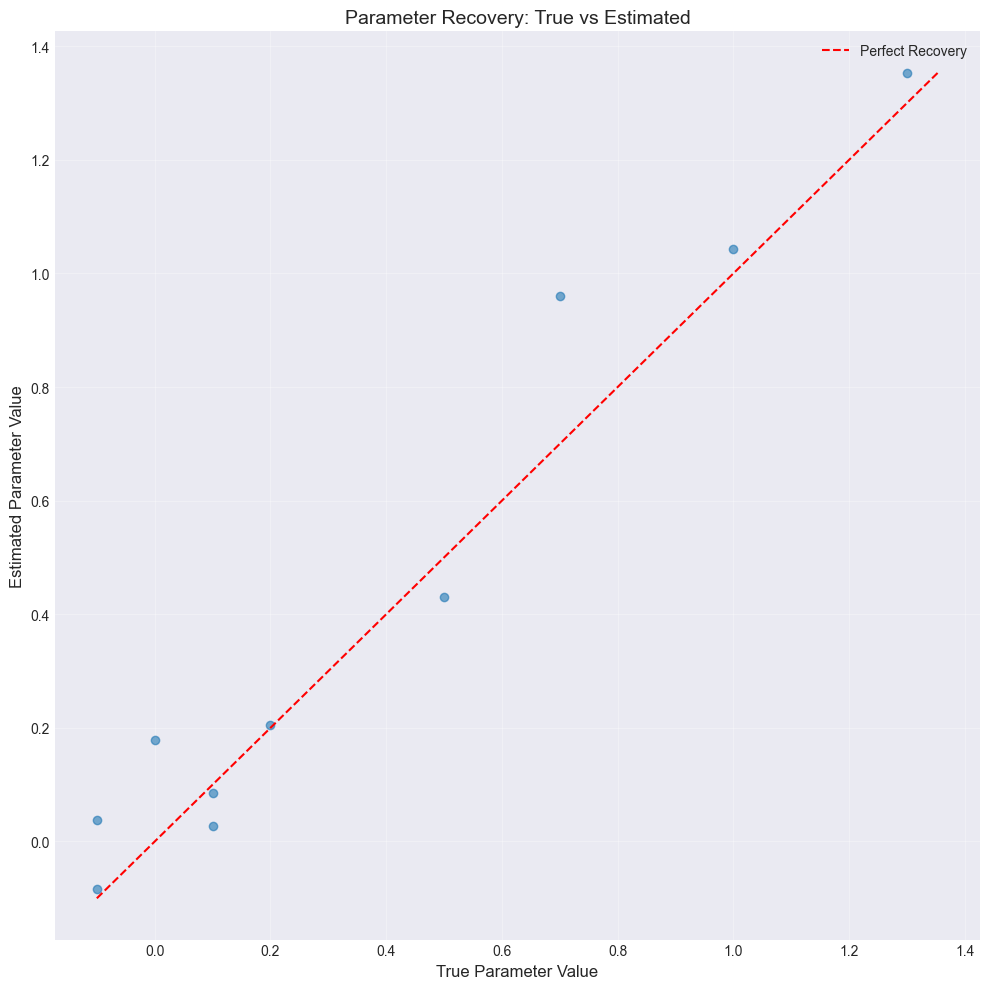

In [7]:
if not combined_df.empty:
    # Calculate correlation per parameter type
    print("\n📊 Correlation Analysis")
    print("=" * 80)
    
    for param_name in combined_df['Parameter Name'].unique():
        param_data = combined_df[combined_df['Parameter Name'] == param_name]
        if len(param_data) > 1:
            corr = param_data['True'].corr(param_data['Estimated'])
            print(f"{param_name:30s}: r = {corr:.4f}")
    
    # Scatter plot: True vs Estimated
    print("\n📈 True vs Estimated Parameters")
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(combined_df['True'], combined_df['Estimated'], alpha=0.6)
    
    # Add diagonal line
    min_val = min(combined_df['True'].min(), combined_df['Estimated'].min())
    max_val = max(combined_df['True'].max(), combined_df['Estimated'].max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Recovery')
    
    ax.set_xlabel('True Parameter Value', fontsize=12)
    ax.set_ylabel('Estimated Parameter Value', fontsize=12)
    ax.set_title('Parameter Recovery: True vs Estimated', fontsize=14)
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

### Distribution of Delta Values


📊 Distribution of Parameter Differences (Delta)


/var/folders/7d/31qr6vtx2td04_zgs68v8n400000gn/T/ipykernel_54410/1791971973.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(param_groups.values, labels=param_groups.index)


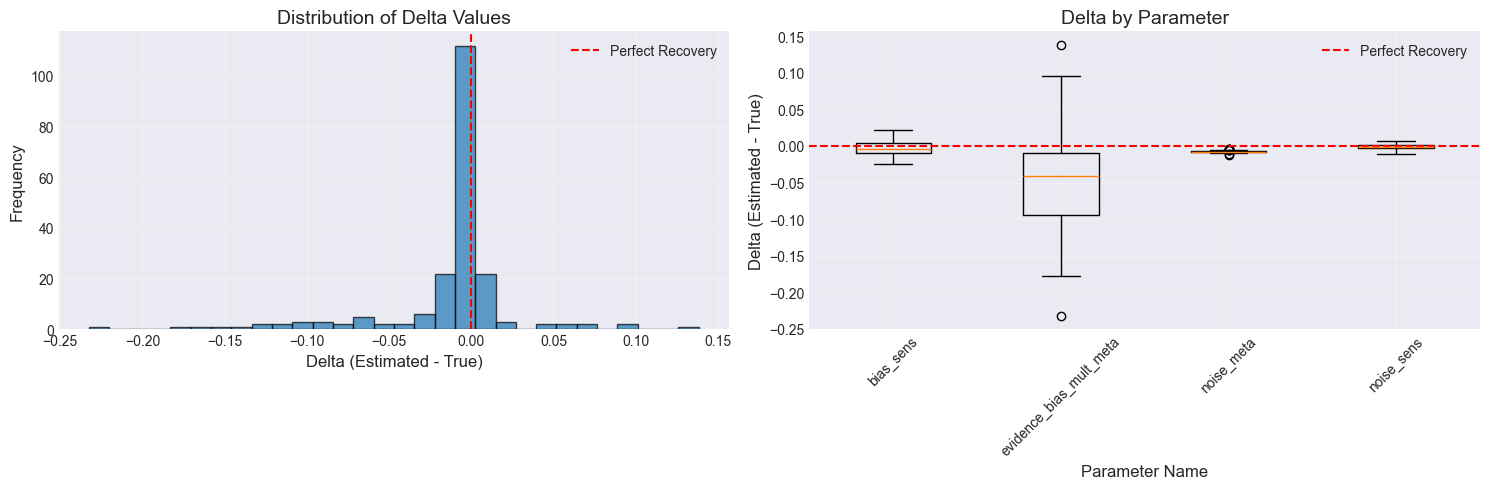

In [16]:
if not combined_df.empty:
    print("\n📊 Distribution of Parameter Differences (Delta)")
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Histogram
    axes[0].hist(combined_df['Delta'], bins=30, edgecolor='black', alpha=0.7)
    axes[0].axvline(0, color='r', linestyle='--', label='Perfect Recovery')
    axes[0].set_xlabel('Delta (Estimated - True)', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].set_title('Distribution of Delta Values', fontsize=14)
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Box plot by parameter
    param_groups = combined_df.groupby('Parameter Name')['Delta'].apply(list)
    axes[1].boxplot(param_groups.values, labels=param_groups.index)
    axes[1].axhline(0, color='r', linestyle='--', label='Perfect Recovery')
    axes[1].set_xlabel('Parameter Name', fontsize=12)
    axes[1].set_ylabel('Delta (Estimated - True)', fontsize=12)
    axes[1].set_title('Delta by Parameter', fontsize=14)
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## Summary Report

In [17]:
if not combined_df.empty:
    print("\n" + "="*80)
    print("SUMMARY REPORT")
    print("="*80)
    
    print(f"\nExperiment ID: {experiment_id}")
    print(f"Total Runs: {combined_df['run_id'].nunique()}")
    print(f"Total Parameters Compared: {len(combined_df)}")
    
    print("\nParameter Recovery Quality:")
    mean_abs_delta = combined_df['Delta'].abs().mean()
    median_abs_delta = combined_df['Delta'].abs().median()
    max_abs_delta = combined_df['Delta'].abs().max()
    
    print(f"  Mean |Delta|:   {mean_abs_delta:.6f}")
    print(f"  Median |Delta|: {median_abs_delta:.6f}")
    print(f"  Max |Delta|:    {max_abs_delta:.6f}")
    
    # Overall correlation
    overall_corr = combined_df['True'].corr(combined_df['Estimated'])
    print(f"\nOverall Correlation (True vs Estimated): r = {overall_corr:.4f}")
    
    print("\n" + "="*80)


SUMMARY REPORT

Experiment ID: EXP0000.num_runs50
Total Runs: 50
Total Parameters Compared: 200

Parameter Recovery Quality:
  Mean |Delta|:   0.022492
  Median |Delta|: 0.007834
  Max |Delta|:    0.232408

Overall Correlation (True vs Estimated): r = 0.9951



## AIC Analysis Across Runs

Analyze AIC values across all successful runs to validate fitting quality:

In [ ]:
def load_all_aic_results():
    """Load AIC results from all successful runs."""
    all_aic = []
    
    for run_id in available_runs:
        run_dir = str(experiment_path / run_id)
        status = utils.check_run_status(run_dir)
        
        if status == "SUCCESS":
            try:
                _, extras_dict = utils.load_param_recov_results(run_dir)
                aic_dict = extras_dict.get('aic', {})
                
                if aic_dict:  # Only include runs with AIC data
                    aic_dict['run_id'] = run_id
                    all_aic.append(aic_dict)
            except Exception as e:
                print(f"⚠️ Could not load AIC from {run_id}: {e}")
    
    if all_aic:
        return pd.DataFrame(all_aic)
    else:
        return pd.DataFrame()

aic_df = load_all_aic_results()

if not aic_df.empty:
    print(f"Loaded AIC data from {len(aic_df)} runs")
    display(aic_df)
else:
    print("⚠️ No AIC data available (this is expected for runs completed before AIC feature was added)")

### AIC Sanity Check Statistics

In [ ]:
if not aic_df.empty:
    print("\n" + "="*80)
    print("AIC SANITY CHECK SUMMARY")
    print("="*80)
    
    # Calculate delta AIC for each component
    aic_df['delta_sens'] = aic_df['aic_sens_fitted'] - aic_df['aic_sens_true']
    aic_df['delta_meta'] = aic_df['aic_meta_fitted'] - aic_df['aic_meta_true']
    aic_df['delta_total'] = aic_df['aic_total_fitted'] - aic_df['aic_total_true']
    
    # Count how many runs pass the sanity check (fitted <= true)
    n_total = len(aic_df)
    n_sens_pass = (aic_df['delta_sens'] <= 0).sum()
    n_meta_pass = (aic_df['delta_meta'] <= 0).sum()
    n_total_pass = (aic_df['delta_total'] <= 0).sum()
    
    print(f"\nRuns with Fitted AIC ≤ True AIC (better is expected):")
    print(f"  Sensory:       {n_sens_pass}/{n_total} ({100*n_sens_pass/n_total:.1f}%)")
    print(f"  Metacognitive: {n_meta_pass}/{n_total} ({100*n_meta_pass/n_total:.1f}%)")
    print(f"  Total:         {n_total_pass}/{n_total} ({100*n_total_pass/n_total:.1f}%)")
    
    print(f"\nDelta AIC Statistics (Fitted - True, negative is better):")
    print(f"  Sensory:")
    print(f"    Mean:   {aic_df['delta_sens'].mean():+.2f}")
    print(f"    Median: {aic_df['delta_sens'].median():+.2f}")
    print(f"    Min:    {aic_df['delta_sens'].min():+.2f}")
    print(f"    Max:    {aic_df['delta_sens'].max():+.2f}")
    
    print(f"  Metacognitive:")
    print(f"    Mean:   {aic_df['delta_meta'].mean():+.2f}")
    print(f"    Median: {aic_df['delta_meta'].median():+.2f}")
    print(f"    Min:    {aic_df['delta_meta'].min():+.2f}")
    print(f"    Max:    {aic_df['delta_meta'].max():+.2f}")
    
    print(f"  Total:")
    print(f"    Mean:   {aic_df['delta_total'].mean():+.2f}")
    print(f"    Median: {aic_df['delta_total'].median():+.2f}")
    print(f"    Min:    {aic_df['delta_total'].min():+.2f}")
    print(f"    Max:    {aic_df['delta_total'].max():+.2f}")
    
    print("\n" + "="*80)

### AIC Visualizations

In [ ]:
if not aic_df.empty:
    print("\n📊 AIC Comparison Visualizations")
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. True vs Fitted AIC (Total)
    ax = axes[0, 0]
    ax.scatter(aic_df['aic_total_true'], aic_df['aic_total_fitted'], alpha=0.6, s=100)
    
    # Add diagonal line (perfect equality)
    min_val = min(aic_df['aic_total_true'].min(), aic_df['aic_total_fitted'].min())
    max_val = max(aic_df['aic_total_true'].max(), aic_df['aic_total_fitted'].max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='Equal AIC', linewidth=2)
    
    ax.set_xlabel('AIC (True Parameters)', fontsize=12)
    ax.set_ylabel('AIC (Fitted Parameters)', fontsize=12)
    ax.set_title('Total AIC: True vs Fitted\n(Points below line = fitted is better)', fontsize=13)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 2. Distribution of Delta AIC (Total)
    ax = axes[0, 1]
    ax.hist(aic_df['delta_total'], bins=20, edgecolor='black', alpha=0.7)
    ax.axvline(0, color='r', linestyle='--', linewidth=2, label='No difference')
    ax.set_xlabel('Delta AIC (Fitted - True)', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_title('Distribution of Delta AIC\n(Negative = fitted is better)', fontsize=13)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 3. Component comparison (Sensory)
    ax = axes[1, 0]
    ax.scatter(aic_df['aic_sens_true'], aic_df['aic_sens_fitted'], 
               alpha=0.6, s=100, label='Sensory', color='blue')
    min_val = min(aic_df['aic_sens_true'].min(), aic_df['aic_sens_fitted'].min())
    max_val = max(aic_df['aic_sens_true'].max(), aic_df['aic_sens_fitted'].max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
    ax.set_xlabel('AIC (True Parameters)', fontsize=12)
    ax.set_ylabel('AIC (Fitted Parameters)', fontsize=12)
    ax.set_title('Sensory AIC: True vs Fitted', fontsize=13)
    ax.grid(True, alpha=0.3)
    
    # 4. Component comparison (Metacognitive)
    ax = axes[1, 1]
    ax.scatter(aic_df['aic_meta_true'], aic_df['aic_meta_fitted'], 
               alpha=0.6, s=100, label='Metacognitive', color='green')
    min_val = min(aic_df['aic_meta_true'].min(), aic_df['aic_meta_fitted'].min())
    max_val = max(aic_df['aic_meta_true'].max(), aic_df['aic_meta_fitted'].max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
    ax.set_xlabel('AIC (True Parameters)', fontsize=12)
    ax.set_ylabel('AIC (Fitted Parameters)', fontsize=12)
    ax.set_title('Metacognitive AIC: True vs Fitted', fontsize=13)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 5. Box plot of Delta AIC by component
    print("\n📊 Delta AIC by Component")
    fig, ax = plt.subplots(figsize=(10, 6))
    
    delta_data = [aic_df['delta_sens'], aic_df['delta_meta'], aic_df['delta_total']]
    ax.boxplot(delta_data, labels=['Sensory', 'Metacognitive', 'Total'])
    ax.axhline(0, color='r', linestyle='--', linewidth=2, label='No difference')
    ax.set_ylabel('Delta AIC (Fitted - True)', fontsize=12)
    ax.set_title('Distribution of Delta AIC by Component\n(Negative values indicate better fit)', fontsize=13)
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()